# 워드 클라우드 (word cloud)

- 텍스트 데이터를 시각화하여 각 단어의 빈도(or 중요도)에 따라 단어의 크기를 다르게 표현하는 기법

1. 텍스트 전처리
2. 단어 빈도 계산
3. 단어 크기 결정
4. 단어 배치
5. 시각화

(memo)...
배치 알고리즘에 따라서 충돌을 피해서 만들어주는...
배경색, 단어색, 마스크 모양, 등...조정 가능...

In [ ]:
# !pip install wordcloud

In [ ]:
# !pip install fonts

### 데이터 준비

In [ ]:
# !pip install gdown

  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)

   ---------------------------------------- 2/2 [gdown]



In [4]:
import gdown

url = 'https://drive.google.com/uc?id=1OliDPP_KcCM8_RS8YL_NK2yaHYtQaedf'
output = 'sms_spam.csv'

gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1OliDPP_KcCM8_RS8YL_NK2yaHYtQaedf
To: c:\SKN_19\07_nlp\02_preprocessing\sms_spam.csv
100%|██████████| 33.7M/33.7M [00:01<00:00, 27.7MB/s]


'sms_spam.csv'

### 텍스트 전처리

In [5]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
spam_df = pd.read_csv('./sms_spam.csv')
spam_df

,SEQ,CN
0,842298,[Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지...
1,842299,[Web발신]ifg@(광고)[전자랜드중동점]ifg@최은순 고객님!ifg@전자랜드 *...
2,842300,"제목 : (광고)현대미아점 통합ifg@▶*O,OOO원할인권◀도착ifg@현대미아 설화..."
3,842301,[Web발신]ifg@(광고) 신세계면세점 명동점ifg@ifg@본 문자 수신 고객님께...
4,842302,[Web발신]ifg@(광고) 롯데마트 소중한 집사의 통장을 지켜라! 멍이도 냥이도 ...
...,...,...
29583,871887,"[국제발신]ifg@저한국에가는데 친구가 당신이공항에마중나올시간이있다고 했어요, 제L..."
29584,871888,[Web발신]ifg@(광고) 루이까스텔 인천구월*ifg@★루이까스텔 인천구월점★if...
29585,871889,[국제발신]ifg@나는 한국에 있어 한국 오빠를 찾아서 같이 살고 싶다 나의 라인을...
29586,871890,"[국제발신]ifg@요즘 잘 지내세요? *월 *일에 한국으로 여행 오고 싶은데, 같이..."


1. 텍스트 전처리
2. 단어 빈도 계산
3. 단어 크기 결정
4. 단어 배치
5. 시각화

In [12]:
corpus = spam_df['CN'][0]
corpus

'[Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지막 최대할인입니다!!!!!!!ifg@SKT SKT SKT 기기변경 기기변경 ifg@ifg@▶▶▶▶▶Z플립* ***G◀◀◀◀◀ifg@☞☞☞☞공시지원금 기준☜☜☜☜ifg@ifg@기기값 : *,***,***원ifg@ifg@공시지원금 : -***,***원ifg@매장추가지원금 : -***,***원 ifg@ifg@★★★구매금액 : **,***원★★★ifg@ifg@***G 대용량 저장공간이라 오래오래 사용하실 수 있습니다!!!!ifg@극소량으로 조기종료가능성 있습니다ifg@ifg@▶ 단골이라서 더 드림 혜택 자세히 보기(SKT 공식 대리점 홈페이지로 연결) ifg@http://dangol.t-mms.kr/dt.do?m=*********&u=tworldfriends.co.kr/D*********ifg@ifg@(무료ARS)수신거부 및 단골해지 : ifg@***-***-****'

In [13]:
okt = Okt()
nouns = okt.nouns(corpus)
nouns

['발신',
 '광고',
 '한음',
 '대리점',
 '율량점',
 '류태자',
 '단골',
 '고객',
 '마지막',
 '최대',
 '할인',
 '기기',
 '변경',
 '기기',
 '변경',
 '플립',
 '원금',
 '기준',
 '기기',
 '값',
 '원',
 '원금',
 '원',
 '매장',
 '추가',
 '원금',
 '원',
 '구매',
 '금액',
 '원',
 '용량',
 '장공',
 '오래오래',
 '사용',
 '수',
 '소량',
 '조기',
 '종료',
 '가능성',
 '단골',
 '더',
 '드림',
 '혜택',
 '보기',
 '공식',
 '대리점',
 '홈페이지',
 '연결',
 '무료',
 '수신',
 '거부',
 '및',
 '단골',
 '해지']

In [14]:
word_count = Counter(nouns)
word_count

Counter({'원': 4,
         '단골': 3,
         '기기': 3,
         '원금': 3,
         '대리점': 2,
         '변경': 2,
         '발신': 1,
         '광고': 1,
         '한음': 1,
         '율량점': 1,
         '류태자': 1,
         '고객': 1,
         '마지막': 1,
         '최대': 1,
         '할인': 1,
         '플립': 1,
         '기준': 1,
         '값': 1,
         '매장': 1,
         '추가': 1,
         '구매': 1,
         '금액': 1,
         '용량': 1,
         '장공': 1,
         '오래오래': 1,
         '사용': 1,
         '수': 1,
         '소량': 1,
         '조기': 1,
         '종료': 1,
         '가능성': 1,
         '더': 1,
         '드림': 1,
         '혜택': 1,
         '보기': 1,
         '공식': 1,
         '홈페이지': 1,
         '연결': 1,
         '무료': 1,
         '수신': 1,
         '거부': 1,
         '및': 1,
         '해지': 1})

In [15]:
ko_stopwords = ["및", "더", "수"]
word_count = {word: count for word, count in word_count.items() if word not in ko_stopwords}
word_count

{'발신': 1,
 '광고': 1,
 '한음': 1,
 '대리점': 2,
 '율량점': 1,
 '류태자': 1,
 '단골': 3,
 '고객': 1,
 '마지막': 1,
 '최대': 1,
 '할인': 1,
 '기기': 3,
 '변경': 2,
 '플립': 1,
 '원금': 3,
 '기준': 1,
 '값': 1,
 '원': 4,
 '매장': 1,
 '추가': 1,
 '구매': 1,
 '금액': 1,
 '용량': 1,
 '장공': 1,
 '오래오래': 1,
 '사용': 1,
 '소량': 1,
 '조기': 1,
 '종료': 1,
 '가능성': 1,
 '드림': 1,
 '혜택': 1,
 '보기': 1,
 '공식': 1,
 '홈페이지': 1,
 '연결': 1,
 '무료': 1,
 '수신': 1,
 '거부': 1,
 '해지': 1}

### WordCloud 객체 생성

In [53]:
 wordcloud = WordCloud(
    width=800,
    height=800,
    font_path='C:\\Windows\\Fonts\\Malgunbd.ttf',
    background_color='white',

   #  max_font_size=250,
   #  scale=2,
   #  mask=None,
   #  max_words=200,
   #  min_font_size=10,
   #  stopwords=None,
   #  random_state=None,

 ).generate_from_frequencies(word_count)
 wordcloud

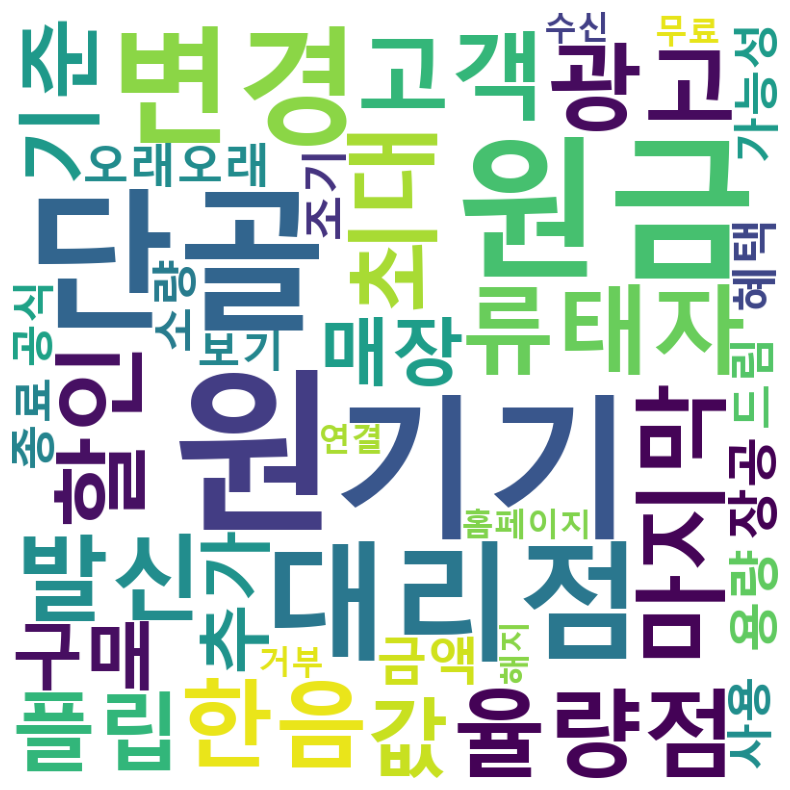

In [55]:
# wordcloud.to_image()
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### 전처리 없이 WordCloud 시각화

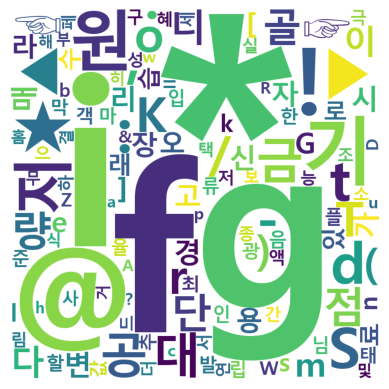

In [59]:
text = spam_df['CN'][0]

word_count = Counter(text)

wordcloud = WordCloud(
    width=800,
    height=800,
    font_path='C:\\Windows\\Fonts\\Malgunbd.ttf',
    background_color='white',
).generate_from_frequencies(word_count)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 전체 corpus로 WordCloud 그리기!

In [85]:
# 전체 corpus로 WordCloud 그리기

corpus = spam_df['CN']

okt = Okt()
nouns = []


for corpus_temp in corpus:
    nouns.extend(okt.nouns(corpus_temp))
nouns

['발신',
 '광고',
 '한음',
 '대리점',
 '율량점',
 '류태자',
 '단골',
 '고객',
 '마지막',
 '최대',
 '할인',
 '기기',
 '변경',
 '기기',
 '변경',
 '플립',
 '원금',
 '기준',
 '기기',
 '값',
 '원',
 '원금',
 '원',
 '매장',
 '추가',
 '원금',
 '원',
 '구매',
 '금액',
 '원',
 '용량',
 '장공',
 '오래오래',
 '사용',
 '수',
 '소량',
 '조기',
 '종료',
 '가능성',
 '단골',
 '더',
 '드림',
 '혜택',
 '보기',
 '공식',
 '대리점',
 '홈페이지',
 '연결',
 '무료',
 '수신',
 '거부',
 '및',
 '단골',
 '해지',
 '발신',
 '광고',
 '전자랜드',
 '동점',
 '최은순',
 '고객',
 '전자랜드',
 '월',
 '전국동시',
 '일',
 '기간',
 '토',
 '월',
 '가전제품',
 '배달',
 '전자랜드',
 '배민',
 '스토어',
 '바로',
 '배달',
 '혼수',
 '가전',
 '견적',
 '꼭',
 '한번',
 '곳',
 '에어컨',
 '추천',
 '전문가',
 '에어컨',
 '만',
 '냉장고',
 '건조기',
 '등',
 '개',
 '품목',
 '전국동시',
 '일',
 '선풍기',
 '인치',
 '원',
 '건조기',
 '삼성',
 '만',
 '냉장고',
 '만',
 '인치',
 '만',
 '삼성',
 '인치',
 '만',
 '아이폰',
 '미니',
 '갤럭시',
 '학생',
 '폰',
 '추천',
 '원',
 '만원',
 '모바일',
 '행사',
 '내용',
 '보기',
 '갤럭시',
 '원',
 '갤럭시',
 '만원',
 '갤럭시',
 '울트라',
 '만원',
 '갤럭시',
 '플립',
 '만원',
 '아이폰',
 '미니',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '프로',
 '만원',
 '개월',
 '약정',
 '통신',
 '사별'

In [77]:
# 단어 빈도 계산
word_count = Counter(nouns)

# 불용어 제거
ko_stopwords = ["및", "더", "수", "을", "를", "가", "이", "은", "들", "좀", "잘", "걍", "과", "도", "를", "으로", "자", "에", "와", "한", "하다"]

word_count = {word: count for word, count in word_count.items() if word not in ko_stopwords}

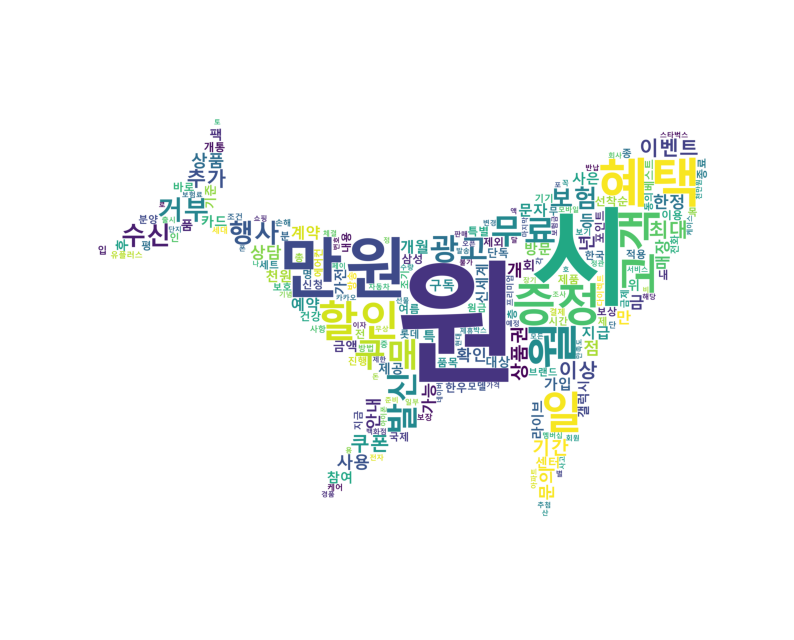

In [83]:
# WordCloud 객체 생성
from PIL import Image

wordcloud = WordCloud(
    width=800,
    height=600,
    font_path='C:\\Windows\\Fonts\\Malgunbd.ttf',
    background_color='white',
    mask=np.array(Image.open('C:\\SKN_19\\07_nlp\\02_preprocessing\\whale.jpg'))
).generate_from_frequencies(word_count)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [84]:
# 이미지 저장
wordcloud.to_file('ko_sms_spam_wordcloud.png')